In [1]:
# Importing needed packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




In [2]:
# Loading the dataset 
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check the shape of the dataset 
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Statistical summary of numerical columns 
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Check unique values in each columns 
for column in data.columns[1:]:
    print(column)
    print('-----------------------------')
    print(data[column].unique())

gender
-----------------------------
['Female' 'Male']
SeniorCitizen
-----------------------------
[0 1]
Partner
-----------------------------
['Yes' 'No']
Dependents
-----------------------------
['No' 'Yes']
tenure
-----------------------------
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
-----------------------------
['No' 'Yes']
MultipleLines
-----------------------------
['No phone service' 'No' 'Yes']
InternetService
-----------------------------
['DSL' 'Fiber optic' 'No']
OnlineSecurity
-----------------------------
['No' 'Yes' 'No internet service']
OnlineBackup
-----------------------------
['Yes' 'No' 'No internet service']
DeviceProtection
-----------------------------
['No' 'Yes' 'No internet service']
TechSupport
-----------------------------
['No' 'Yes' 'No internet service']
Streami

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
numerical_data = data[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
categorical_data = data.drop(['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'], axis  =  1)
numerical_data.info() , categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   

(None, None)

In [10]:
non_num = []
for i in numerical_data['TotalCharges']:
    try :
        float(i)
    except:
        non_num.append(i)

In [11]:
non_num

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [12]:
numerical_data['TotalCharges'].replace(' ', None, inplace= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21264\1855673517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['TotalCharges'].replace(' ', None, inplace= True)


In [13]:
numerical_data['TotalCharges'] = numerical_data['TotalCharges'].astype('float')


C:\Users\Admin\AppData\Local\Temp\ipykernel_21264\288159713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['TotalCharges'] = numerical_data['TotalCharges'].astype('float')


In [14]:
numerical_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [15]:
categorical_data.shape

(7043, 17)

Text(0.5, 1.0, 'Total Charges')

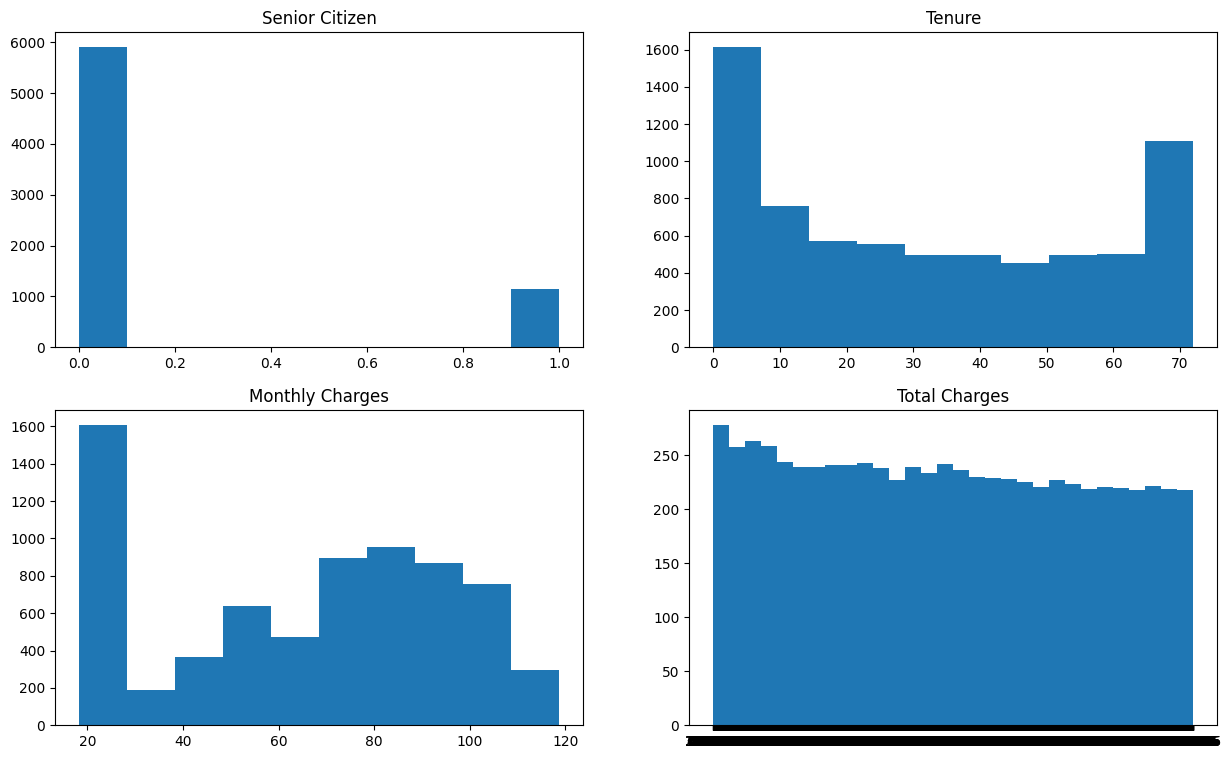

In [16]:
figure, axis = plt.subplots(2, 2, figsize = (15,9))

axis[0, 0].hist(data['SeniorCitizen'])
axis[0, 0].set_title("Senior Citizen")

axis[0, 1].hist(data['tenure'])
axis[0, 1].set_title("Tenure")

axis[1, 0].hist(data['MonthlyCharges'])
axis[1, 0].set_title("Monthly Charges")

axis[1, 1].hist(data['TotalCharges'], bins = 30)
axis[1, 1].set_title("Total Charges")

In [17]:
numerical_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [18]:
categorical_data.drop('customerID', axis = 1 , inplace = True)



In [19]:
data_enc = pd.get_dummies(categorical_data, drop_first=True)
data_enc.shape


(7043, 27)

In [20]:
data_new = data_enc.drop(['InternetService_No','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],axis = 1)

In [21]:
cor = data_new.corr(method = 'pearson')
cor.style.background_gradient('coolwarm')





,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
gender_Male,1.000000,-0.001808,0.010517,-0.006488,0.006488,-0.008414,-0.011286,0.006026,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744,-0.008612
Partner_Yes,-0.001808,1.000000,0.452676,0.017706,-0.017706,0.142057,0.000304,0.000615,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125,-0.150448
Dependents_Yes,0.010517,0.452676,1.000000,-0.001762,0.001762,-0.024526,-0.165818,0.139812,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071,-0.164221
PhoneService_Yes,-0.006488,0.017706,-0.001762,1.000000,-1.000000,0.279690,0.289999,0.172209,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319,0.011942
MultipleLines_No phone service,0.006488,-0.017706,0.001762,-1.000000,1.000000,-0.279690,-0.289999,-0.172209,0.092893,0.052312,0.071227,0.096340,0.022574,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319,-0.011942
MultipleLines_Yes,-0.008414,0.142057,-0.024526,0.279690,-0.279690,1.000000,0.366083,-0.210564,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,-0.003794,0.106253,0.163530,0.060048,0.083618,-0.227206,0.040102
InternetService_Fiber optic,-0.011286,0.000304,-0.165818,0.289999,-0.289999,0.366083,1.000000,-0.465793,-0.030696,0.165651,0.176049,-0.020492,0.329349,0.322923,-0.076324,-0.211526,0.326853,-0.050077,0.336410,-0.306834,0.308020
OnlineSecurity_No internet service,0.006026,0.000615,0.139812,0.172209,-0.172209,-0.210564,-0.465793,1.000000,-0.333403,-0.381593,-0.380754,-0.336298,-0.415552,-0.418675,0.038004,0.218278,-0.321013,0.001030,-0.284917,0.321361,-0.227890
OnlineSecurity_Yes,-0.017021,0.143106,0.080972,-0.092893,0.092893,0.098108,-0.030696,-0.333403,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.100162,0.191773,-0.003636,0.115721,-0.112338,-0.080798,-0.171226
OnlineBackup_Yes,-0.013773,0.141498,0.023671,-0.052312,0.052312,0.202237,0.165651,-0.381593,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.083722,0.111400,0.126735,0.090785,-0.000408,-0.174164,-0.082255


In [22]:
data_new.shape

(7043, 21)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA


In [24]:
final_data = pd.concat([data_new, numerical_data], axis = 1 )

In [25]:
final_data = final_data.sample(frac=1)
final_0_data = final_data[final_data['Churn_Yes'] == 0]
final_1_data = final_data[final_data['Churn_Yes'] == 1]

print(final_1_data.shape)
print(final_0_data.shape)


num_major_class = len(final_1_data) + (len(final_0_data) - len(final_1_data)) /  2
df = pd.concat([final_0_data[int(num_major_class):], final_1_data] , axis = 0)

(1869, 25)
(5174, 25)


In [27]:

df.dropna(inplace=True)
X = df.drop('Churn_Yes', axis = 1)
y = df['Churn_Yes']


smote = SMOTE(sampling_strategy='minority')

X_train , X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, )

print(X_train.shape[1])

X_sm ,y_sm = smote.fit_resample(X_train,y_train)

scaler = StandardScaler()
scaler.fit(X_sm)

X_train_trans = scaler.transform(X_sm)
X_test_trans = scaler.transform(X_test)


pca = PCA(0.90)
pca.fit(X_train_trans)

X_train_trans = pca.transform(X_train_trans)
X_test_trans = pca.transform(X_test_trans)

24


In [28]:
pca.n_components_

16

In [29]:
classifier = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=8,min_samples_split= 10,min_samples_leaf = 5)
classifier.fit(X_train_trans,y_sm)

RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200)

In [30]:
pred = classifier.predict(X_test_trans)

In [31]:
accuracy_score(y_test, pred)

0.7642045454545454

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       316
           1       0.79      0.79      0.79       388

    accuracy                           0.76       704
   macro avg       0.76      0.76      0.76       704
weighted avg       0.76      0.76      0.76       704



In [33]:
confusion_matrix(y_test, pred)

array([[233,  83],
       [ 83, 305]], dtype=int64)

In [34]:
import tensorflow as tf


In [39]:
# Crete the model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dense(100, activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dense(100, activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.05)),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

# compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(X_train_trans, 
                        y_sm,
                        epochs =150,
                        validation_data = (X_test_trans,y_test))

Epoch 1/150


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


93/93 [==============================] - 2s 6ms/step - loss: 11.2303 - accuracy: 0.5925 - val_loss: 10.4235 - val_accuracy: 0.6364
Epoch 2/150
93/93 [==============================] - 0s 4ms/step - loss: 9.7156 - accuracy: 0.6570 - val_loss: 9.0138 - val_accuracy: 0.6903
Epoch 3/150
93/93 [==============================] - 0s 4ms/step - loss: 8.4013 - accuracy: 0.6891 - val_loss: 7.7901 - val_accuracy: 0.7188
Epoch 4/150
93/93 [==============================] - 0s 4ms/step - loss: 7.2608 - accuracy: 0.7043 - val_loss: 6.7289 - val_accuracy: 0.7259
Epoch 5/150
93/93 [==============================] - 0s 4ms/step - loss: 6.2719 - accuracy: 0.7225 - val_loss: 5.8100 - val_accuracy: 0.7287
Epoch 6/150
93/93 [==============================] - 0s 4ms/step - loss: 5.4153 - accuracy: 0.7306 - val_loss: 5.0139 - val_accuracy: 0.7344
Epoch 7/150
93/93 [==============================] - 0s 4ms/step - loss: 4.6753 - accuracy: 0.7367 - val_loss: 4.3266 - val_accuracy: 0.7401
Epoch 8/150
93/93 [====

<AxesSubplot:>

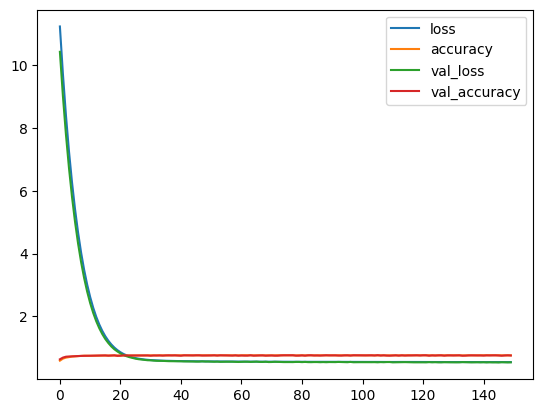

In [40]:
pd.DataFrame(history_1.history).plot()

In [41]:
nn_pred = model_1.predict(X_test_trans)

22/22 [==============================] - 0s 2ms/step


In [42]:
len(nn_pred)

704

In [43]:
pred_nn = np.zeros(len(pred))

for i in range(len(nn_pred)):
    if nn_pred[i][0] < 0.5 :
        pred_nn[i] = 0
    else :
        pred_nn[i] = 1 

In [44]:
pred_nn

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0.

In [45]:
print(classification_report(y_test, pred_nn))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       316
           1       0.78      0.77      0.78       388

    accuracy                           0.76       704
   macro avg       0.75      0.76      0.76       704
weighted avg       0.76      0.76      0.76       704

